# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [56]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [10]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [11]:
temp.dtypes
# City and State are objects whose elements are strings with the name of each city and state 
# Temperature is float64 whose elements are the temperatures of each city

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [12]:
temp[temp["State"] == "New York"]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [17]:
temp[temp["State"] == "New York"]["Temperature"].mean()
#Same as np.mean(temp[temp["State"] == "New York"]["Temperature"])

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [26]:
temp[temp["Temperature"] > 15][["City", "State"]]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [23]:
list(temp[temp["Temperature"] > 15]["City"])

['NYC', 'Hartford', 'Treton', 'Newark']

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [28]:
list(temp[(temp["Temperature"] > 15) & (temp["Temperature"] < 20)]["City"])

['NYC', 'Hartford']

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [47]:
for state in temp["State"].unique():
    mean = temp[temp["State"] == state]["Temperature"].mean()
    std = temp[temp["State"] == state]["Temperature"].std()
    print(f" {state} ---  Mean temperature: {round(mean,2)}, Standard deviation: {round(std,2)}") 
    

 New York ---  Mean temperature: 10.74, Standard deviation: 8.13
 Connecticut ---  Mean temperature: 15.83, Standard deviation: 1.96
 New Jersey ---  Mean temperature: 21.11, Standard deviation: 1.57


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [54]:
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [55]:
employee.dtypes
#Name, Department, Education, Gender, Title are objects with strings in them
#Years and salary are integers

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

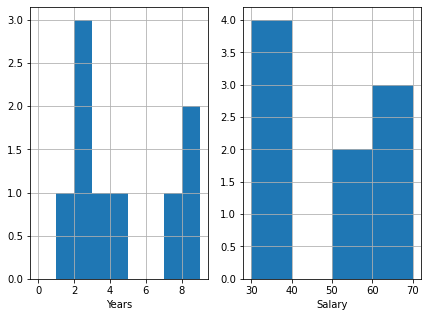

In [71]:
#Only the ones with numerical values
plt.figure(figsize=(7,5))
plt.subplot(1,2, 1)
plt.xlabel("Years")
plt.grid(True)
plt.hist( employee["Years"],bins=range(0,10,1) )
plt.subplot(1,2, 2)
plt.xlabel("Salary")
plt.grid(True)
plt.hist( employee["Salary"],bins=range(30,80,10) )
plt.show()
# Both histobrams show 2 groups of higher and lower values

#### What's the average salary in this company?

In [72]:
employee["Salary"].mean()

48.888888888888886

#### What's the highest salary?

In [73]:
employee["Salary"].max()

70

#### What's the lowest salary?

In [74]:
employee["Salary"].min()

30

#### Who are the employees with the lowest salary?

In [75]:
list(employee[employee["Salary"] == employee["Salary"].min()]["Name"])

['Maria', 'David']

#### Could you give all the information about an employee called David?

In [78]:
employee[employee["Name"] == "David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [86]:
employee[employee["Name"] == "David"].Salary.values[0]

30

#### Print all the rows where job title is associate

In [88]:
employee[employee["Title"] == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [89]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [90]:
# your answer here- 2nd method
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [94]:
employee[(employee["Title"] == "associate") & (employee["Salary"] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [97]:
employee.groupby(by = "Years").mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [98]:
employee.groupby(by = "Title").mean()

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

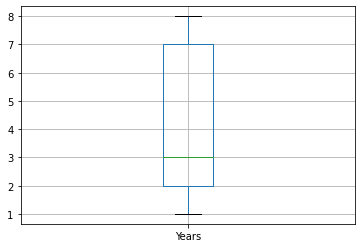

In [108]:
boxplot = employee.boxplot(column=['Years'])

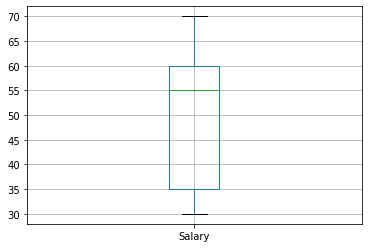

In [109]:
boxplot = employee.boxplot(column=[ 'Salary'])

In [112]:
# print first quartile here
for col in ["Years", "Salary"]
    p25=employee[col].describe()["25%"]
    p75=employee[col].describe()["75%"]
    print(f" Column {col} ---- 1st percentile (25%) : {}  ;   Salary : {}")

2.0

In [28]:
# print third quartile here

#### Is the mean salary per gender different?

In [29]:
# your answer here

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [30]:
# your answer here

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [ ]:
# your answer here

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
# your answer here

In [ ]:
# your answer here

####  What is the average Purchase Price?

In [ ]:
# your answer here

#### What were the highest and lowest purchase prices? 

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Select all the customers we have in Spain

In [ ]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here